In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

=====EDA=====

In [4]:
df = pd.read_csv('./data/NetflixOriginals.csv',encoding='"ISO-8859-1"')
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.nunique()

In [42]:
df['Premiere'] = pd.to_datetime(df['Premiere'])

# 날짜 정렬

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['IMDB Score'], bins=30, color= 'black', kde=True)
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')
plt.title('Distribution of IMDB')
plt.show()

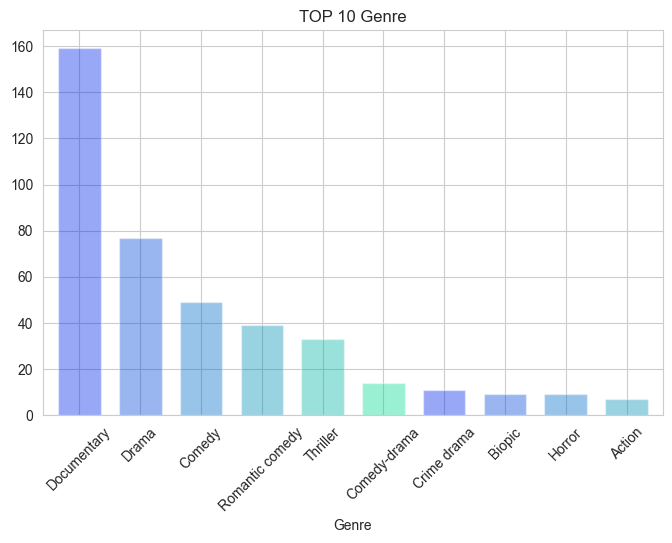

In [157]:
plt.figure(figsize=(8,5))
df.value_counts(df['Genre'])[:10].plot(
    kind='bar',
    width=0.7,
    color = sns.color_palette('winter'),
    alpha = 0.4
)
plt.title('TOP 10 Genre')
_=plt.xticks(rotation=45)

In [18]:
Gen_IMDB = df.groupby(["Genre"])[["IMDB Score"]].mean()
result = Gen_IMDB.sort_values(by='IMDB Score', ascending=False)
result

,IMDB Score
Genre,
Animation/Christmas/Comedy/Adventure,8.200000
Musical / Short,7.700000
Concert Film,7.633333
Anthology/Dark comedy,7.600000
Animation / Science Fiction,7.500000
...,...
Superhero-Comedy,4.400000
Political thriller,4.300000
Horror anthology,4.300000


In [16]:
# 상위 10개 장르의 평균 IMDB Score 계산후 큰 순서대로 반환
mean_top_genres = df[df['Genre'].isin(top_genres)].groupby('Genre')['IMDB Score'].mean()

mean_top_genres.nlargest(10)

Genre
Documentary        6.936478
Crime drama        6.745455
Biopic             6.400000
Drama              6.342857
Comedy-drama       6.214286
Romantic comedy    5.848718
Thriller           5.563636
Comedy             5.506122
Action             5.414286
Horror             5.255556
Name: IMDB Score, dtype: float64

In [158]:
# 각 장르별 빈도수 계산
genre_count = df['Genre'].value_counts()

# 빈도수가 10건 이상인 장르만 필터링
genres_over_10 = genre_count[genre_count >= 10].index

# 필터링된 장르의 평균 'IMDB Score' 및 빈도수 계산
filtered_genres = df[df['Genre'].isin(genres_over_10)]
genre_stats = filtered_genres.groupby("Genre").agg({"IMDB Score": ["mean", "count"]})
genre_stats.columns = ["Avg_IMDB_Score", "Frequency"]

# 평균 'IMDB Score'를 기준으로 내림차순 정렬
sorted_genre_stats = genre_stats.sort_values(by='Avg_IMDB_Score', ascending=False)
sorted_genre_stats

,Avg_IMDB_Score,Frequency
Genre,,
Documentary,6.936478,159
Crime drama,6.745455,11
Drama,6.342857,77
Comedy-drama,6.214286,14
Romantic comedy,5.848718,39
Thriller,5.563636,33
Comedy,5.506122,49


C:\Users\xzv22\AppData\Local\Temp\ipykernel_18264\2616073127.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_lang, x='Language', order=top_lang, palette='viridis')


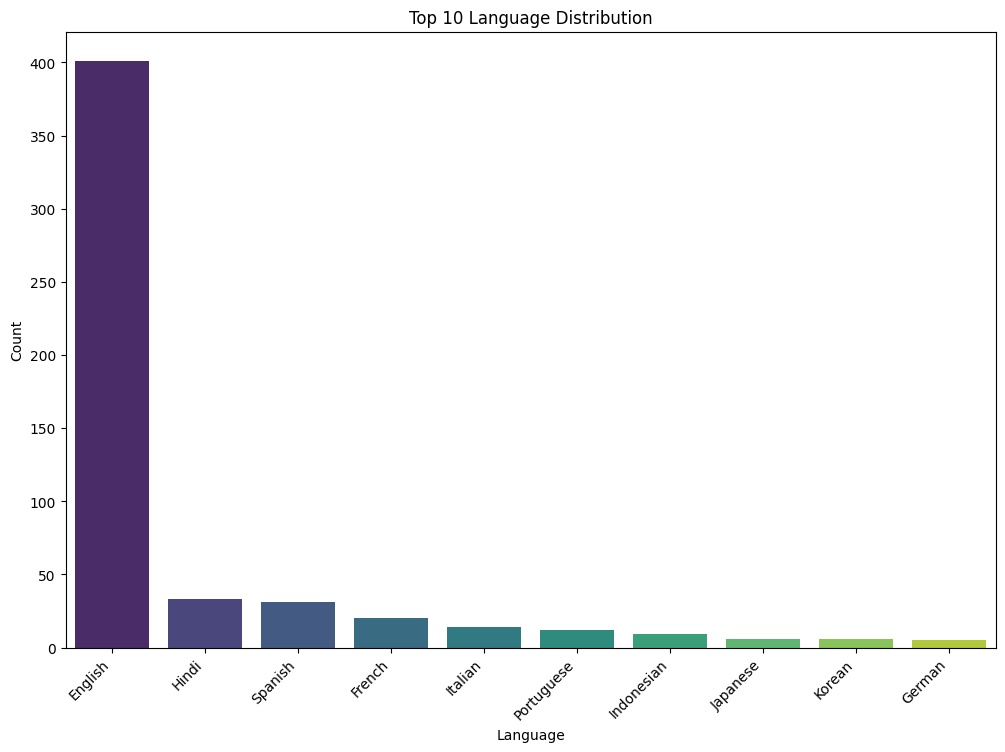

In [31]:
top_lang = df['Language'].value_counts().nlargest(10).index

# 'Language' 상위 10개 항목에 속하는 데이터만 선택
df_top_lang = df[df['Language'].isin(top_lang)]

plt.figure(figsize=(12, 8))
sns.countplot(data=df_top_lang, x='Language', order=top_lang, palette='viridis')
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Top 10 Language Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

In [32]:
#언어별로 IMDB Score 평균

Gen_IMDB = df.groupby(["Language"])[["IMDB Score"]].mean()
result = Gen_IMDB.sort_values(by='IMDB Score', ascending=False)
result

,IMDB Score
Language,
English/Ukranian/Russian,8.400000
English/Akan,7.700000
English/Hindi,7.300000
English/Arabic,7.300000
English/Korean,7.300000
English/Russian,7.300000
Spanish/English,7.300000
Khmer/English/French,7.200000
Tamil,7.200000


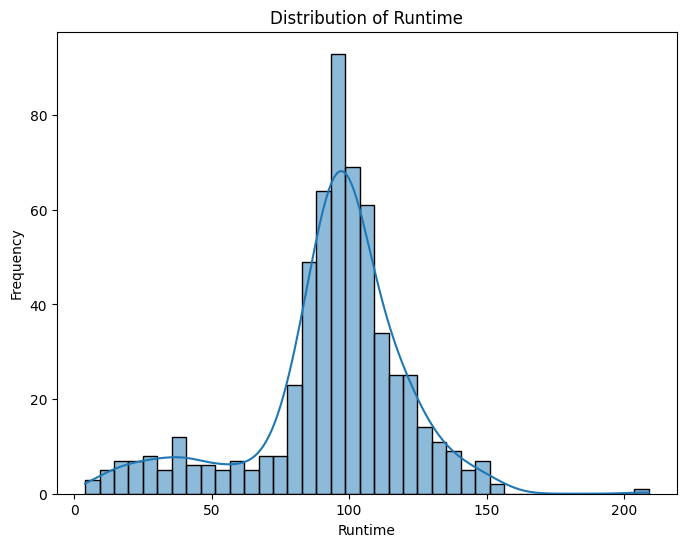

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Runtime'], kde=True)
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Distribution of Runtime')
plt.show()

[Text(0.5, 1.0, 'IMDB score by Runtime')]

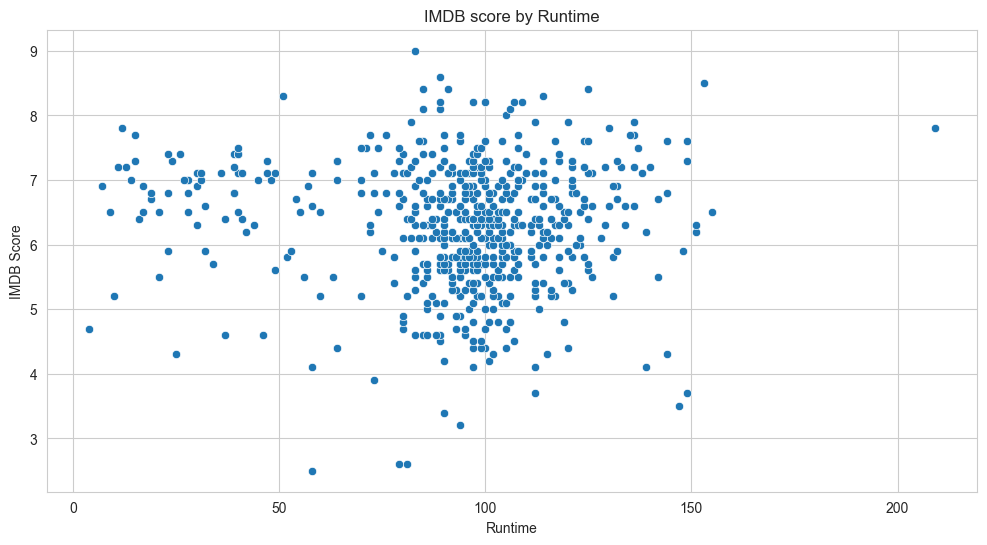

In [35]:
#IMDB score by Runtime 스캐터플롯 
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.scatterplot(data=df,x="Runtime",y="IMDB Score").set(title="IMDB score by Runtime")

<Figure size 1200x1000 with 0 Axes>

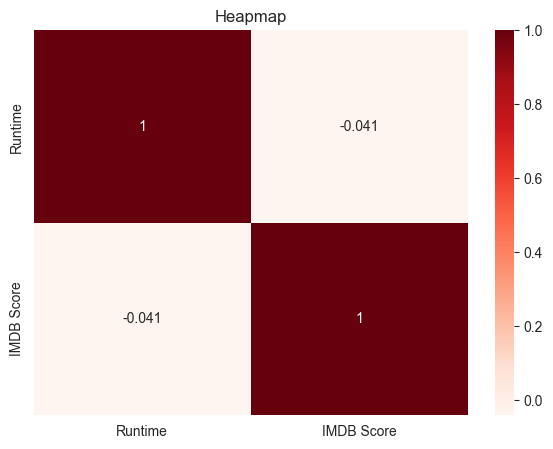

In [37]:
df_1 = df[["Runtime","IMDB Score"]]
cor = df_1.corr()

# Heatmap
plt.figure(figsize=(12,10))
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,ax=ax)
plt.title("Heapmap")
plt.show()

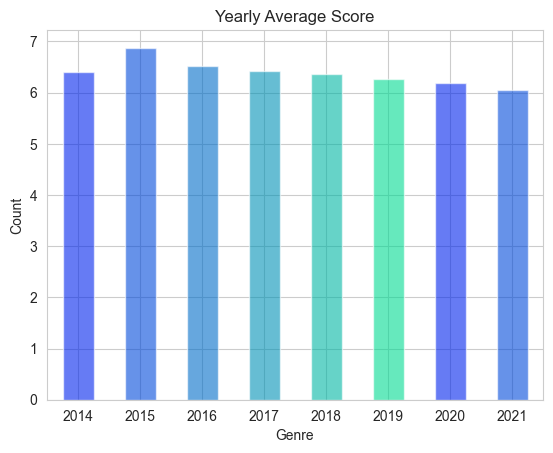

In [44]:
# 연도별 평균 점수

yearly_average_score = df.groupby(df['Premiere'].dt.year)['IMDB Score'].mean()

yearly_average_score.plot(kind='bar',color = sns.color_palette('winter'),alpha=0.6)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Yearly Average Score')
_=plt.xticks(rotation=0)

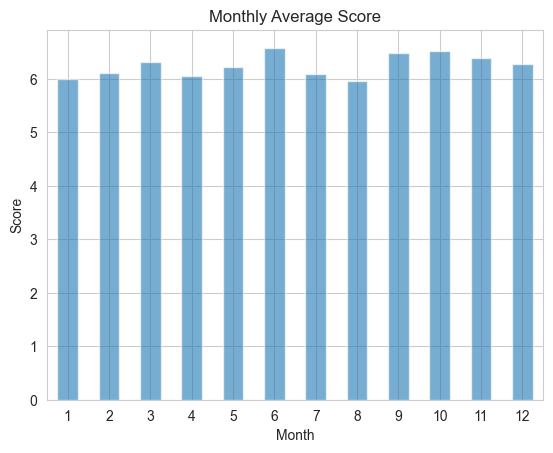

In [47]:
# 월별 스코어

monthly_average_score = df.groupby(df['Premiere'].dt.month)['IMDB Score'].mean()

sns.set_style('whitegrid')
monthly_average_score.plot(kind='bar',alpha=0.6)
plt.xlabel('Month')
plt.ylabel('Score')
plt.title('Monthly Average Score')
_=plt.xticks(rotation=0)

In [48]:
monthly_average_score

Premiere
1     6.002703
2     6.117949
3     6.322917
4     6.049206
5     6.213208
6     6.582857
7     6.091176
8     5.951351
9     6.481132
10    6.522078
11    6.398246
12    6.274510
Name: IMDB Score, dtype: float64

=====T-TEST=====

1번 : 장르

In [71]:
# 등분산성 검정

test_names = ["IMDB Score"]

documentary_scores = df[df['Genre'] == 'Documentary'][['IMDB Score']]
other_scores = df[df['Genre'] != 'Documentary'][['IMDB Score']]

for test_name in test_names:
    _, p_value_levene = stats.levene(documentary_scores[test_name], other_scores[test_name])
    if p_value_levene > 0.05:
        print(f"{test_name} p-value: {p_value_levene}, 등분산 가정 만족")
    else:
        print(f"{test_name} p-value: {p_value_levene}, 이분산 가정 만족")

IMDB Score p-value: 0.009114190007489658, 이분산 가정 만족


In [72]:
t_statistic, p_value = stats.ttest_ind(
    a=documentary_scores,
    b=other_scores,
    alternative="two-sided",
    equal_var=False
)

print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")

p-value: [2.56613755e-25]
귀무 가설 기각: [ True]


2번 : 시기

Text(0.5, 1.0, 'Documentary Monthly Score')

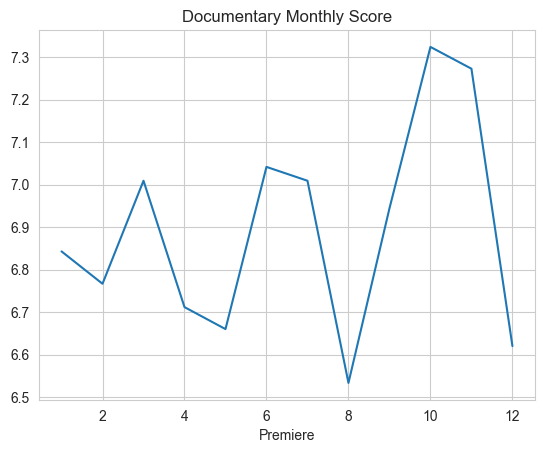

In [58]:
# 다큐멘터리 월 평균 점수
documentary_monthly_score = df[df['Genre']=='Documentary'].groupby(df['Premiere'].dt.month)['IMDB Score'].mean()

documentary_monthly_score.plot(kind='line')
plt.title('Documentary Monthly Score')

In [74]:
# 등분산성 검정
test_names = ["IMDB Score"]

june_scores = df[(df['Premiere'].dt.month == 10) & (df['Genre'] == 'Documentary')][['IMDB Score']]
other_scores = df[(df['Premiere'].dt.month != 10) & (df['Genre'] == 'Documentary')][['IMDB Score']]
for test_name in test_names:
    _, p_value_levene = stats.levene(june_scores[test_name], other_scores [test_name])
    if p_value_levene > 0.05:
        print(f"{test_name} p-value: {p_value_levene}, 등분산 가정 만족")
    else:
        print(f"{test_name} p-value: {p_value_levene}, 이분산 가정 만족")

IMDB Score p-value: 0.6591983078250134, 등분산 가정 만족


In [75]:
t_statistic, p_value = stats.ttest_ind(
    a=june_scores,
    b=other_scores ,
    alternative="two-sided",
    equal_var=True
)

print(f"p-value: {p_value}")
print(f"귀무 가설 기각 : {p_value < 0.05}")

p-value: [0.01185071]
귀무 가설 기각 : [ True]


3번 : 상영시간

[Text(0.5, 1.0, 'IMDB score by Documentary Runtime')]

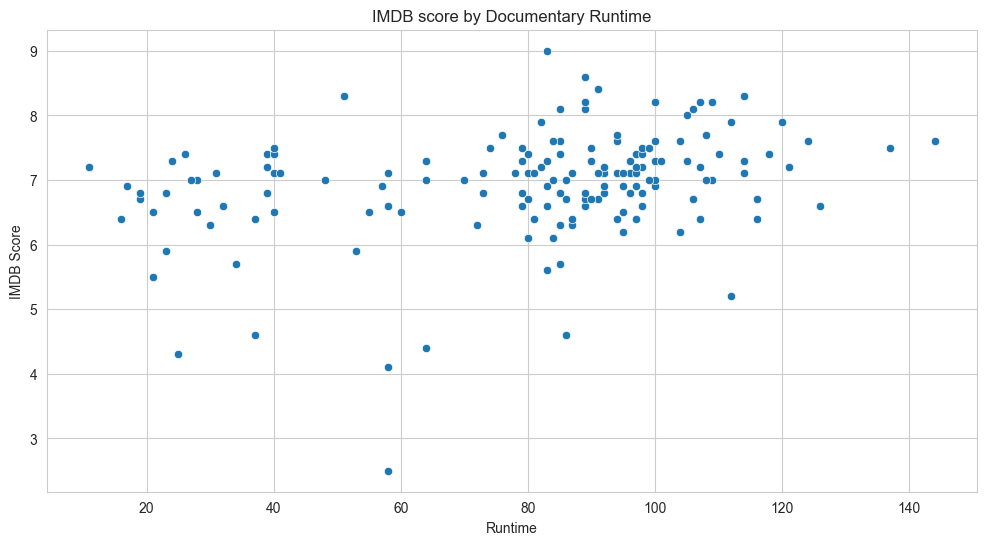

In [76]:
#IMDB score by Documentary Runtime 스캐터플롯 
documentary_runtime= df[df['Genre']=='Documentary']
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.scatterplot(data=documentary_runtime,x="Runtime",y="IMDB Score").set(title="IMDB score by Documentary Runtime")

In [110]:
documentary_df = df[df['Genre'] == 'Documentary']

threshold = documentary_df['IMDB Score'].quantile(0.75)
documentary_df['Runtime_Group'] = (documentary_df['IMDB Score'] > threshold).astype(int)


C:\Users\xzv22\AppData\Local\Temp\ipykernel_18264\3035184384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  documentary_df['group'] = (documentary_df['IMDB Score'] > threshold).astype(int)


In [117]:
documentary_df.groupby('Runtime_Group')[['IMDB Score','Runtime']].mean()

,IMDB Score,Runtime
Runtime_Group,,
0,6.385185,72.160494
1,7.508974,86.025641


In [119]:
test_names = ["Runtime"]

top_25= documentary_df[documentary_df['Runtime_Group'] == 1][['Runtime']]
top_75 = documentary_df[documentary_df['Runtime_Group'] == 0][['Runtime']]

for test_name in test_names:
    _, p_value_levene = stats.levene(top_25[test_name], top_75[test_name])
    if p_value_levene > 0.05:
        print(f"{test_name} p-value: {p_value_levene}, 등분산 가정 만족")
    else:
        print(f"{test_name} p-value: {p_value_levene}, 이분산 가정 만족")

Runtime p-value: 0.13956383001655934, 등분산 가정 만족


In [120]:
t_statistic, p_value = stats.ttest_ind(
    a=top_25,
    b=top_75,
    alternative="two-sided",
    equal_var=True
)
print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")

p-value: [0.00238879]
귀무 가설 기각: [ True]


4번 : 언어

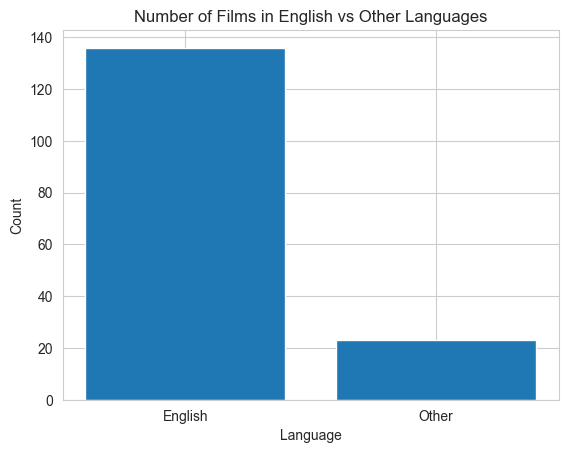

In [134]:
english = df[(df['Genre']=='Documentary') & (df['Language'].str.contains('English'))]
other = df[(df['Genre']=='Documentary') & (~df['Language'].str.contains('English'))]

plt.bar(['English', 'Other'], [len(english), len(other)])
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Number of Films in English vs Other Languages')
plt.show()

In [142]:
#English 포함, 미포함 등분산성 검정

test_names = ["IMDB Score"]

english_scores = df[(df['Genre']=='Documentary') & (df['Language'].str.contains('English'))][['IMDB Score']]
other_scores = df[(df['Genre']=='Documentary') & (~df['Language'].str.contains('English'))][['IMDB Score']]

for test_name in test_names:
    _, p_value_levene = stats.levene(english_scores[test_name], other_scores[test_name])
    if p_value_levene > 0.05:
        print(f"{test_name} p-value: {p_value_levene}, 등분산 가정 만족")
    else:
        print(f"{test_name} p-value: {p_value_levene}, 이분산 가정 만족")

IMDB Score p-value: 0.9644657613177915, 등분산 가정 만족


In [148]:
#English 포함, 미포함 T-test

t_statistic, p_value = stats.ttest_ind(
    a=english_scores,
    b=other_scores,
    alternative="two-sided",
    equal_var=True
)

print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")

p-value: [0.23643063]
귀무 가설 기각: [False]


=====Limitations=====

In [ ]:
df.groupby('Language')['Language'].value_counts()

In [ ]:
df.groupby('Genre')['Genre'].value_counts().nlargest(15)